In [1]:
%pip install wordcloud  
# A visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -U spacy
# SpaCy is an open-source natural language processing (NLP) library for Python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English


In [3]:
df = pd.read_excel('FakeJobPostings.xlsx')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

## Managing the features for Visualization

In [5]:
# checking for null values

df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                9
requirements            2734
benefits                7243
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
# deleting the columns which have no importance or have many null values, more will deleted later after visualization

columns = ['job_id','salary_range','telecommuting','has_company_logo','has_questions','employment_type']

for i in columns:
    del df[i]

df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.shape

(17880, 12)

In [8]:
df.fillna('',inplace = True)
# It is going to replace null values with spaces becuase some columns have few null values or it is an important column for the model

In [9]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Visualization of the Data

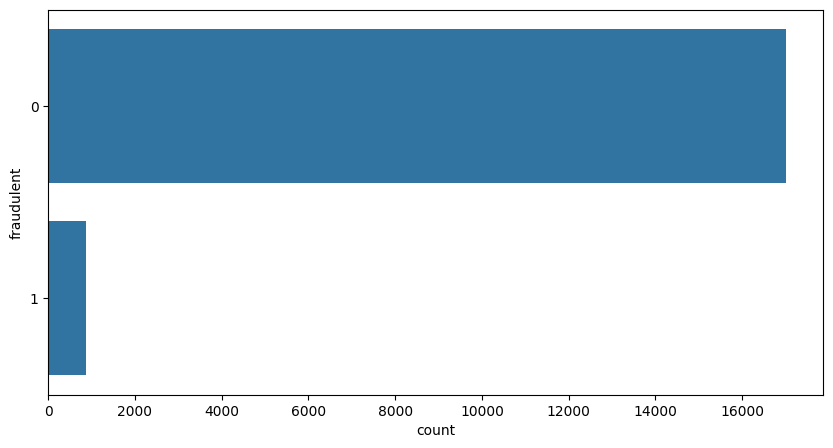

In [10]:
# Visualizing the total number of fraudulent cases

plt.figure(figsize = (10,5))
sns.countplot(y = 'fraudulent', data = df)
plt.show()

In [11]:
# Total number of fraudulent and non-fraudulent cases

df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [12]:
# It counts the total number of unique required experience except the empty required experience

exp = dict(df.required_experience.value_counts())
del exp['']
exp

{'Mid-Senior level': np.int64(3809),
 'Entry level': np.int64(2697),
 'Associate': np.int64(2297),
 'Not Applicable': np.int64(1116),
 'Director': np.int64(389),
 'Internship': np.int64(381),
 'Executive': np.int64(141)}

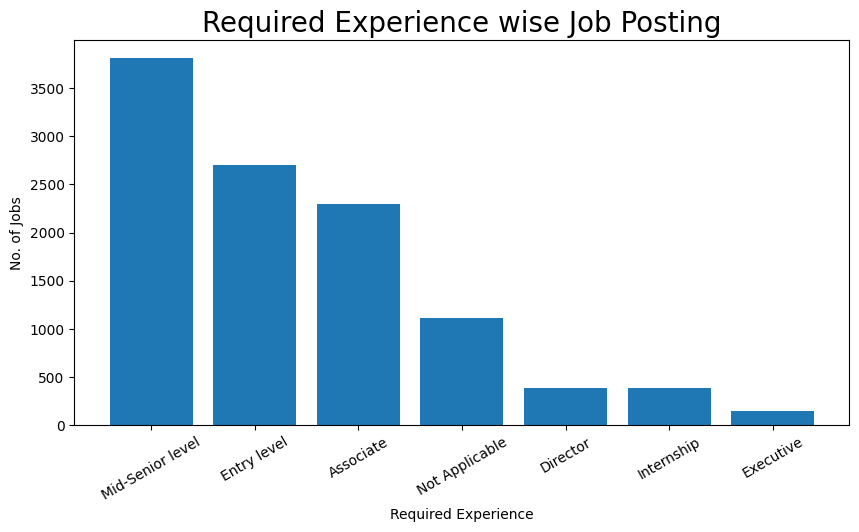

In [13]:
plt.figure(figsize = (10,5))
plt.bar(exp.keys(),exp.values())
plt.title("Required Experience wise Job Posting", size = 20)
plt.xlabel('Required Experience')
plt.ylabel('No. of Jobs')
plt.xticks(rotation = 30)
plt.show()

In [14]:
#It is creating a new column in the dataset which will extract the country from the location and put it in the new column named country

def split(location):
    l = location.split(',')
    return l[0]
df['country'] = df.location.apply(split)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [15]:
# It counts the total number of countries except the empty countries, there are many countries in the column which has low job posting so it will be showing only top 15 countries (if empty country is also included in the top 15 then it will be removed)

countr = dict(df.country.value_counts()[:15])
del countr['']
countr

{'US': np.int64(10656),
 'GB': np.int64(2384),
 'GR': np.int64(940),
 'CA': np.int64(457),
 'DE': np.int64(383),
 'NZ': np.int64(333),
 'IN': np.int64(276),
 'AU': np.int64(214),
 'PH': np.int64(132),
 'NL': np.int64(127),
 'BE': np.int64(117),
 'IE': np.int64(114),
 'SG': np.int64(80),
 'HK': np.int64(77)}

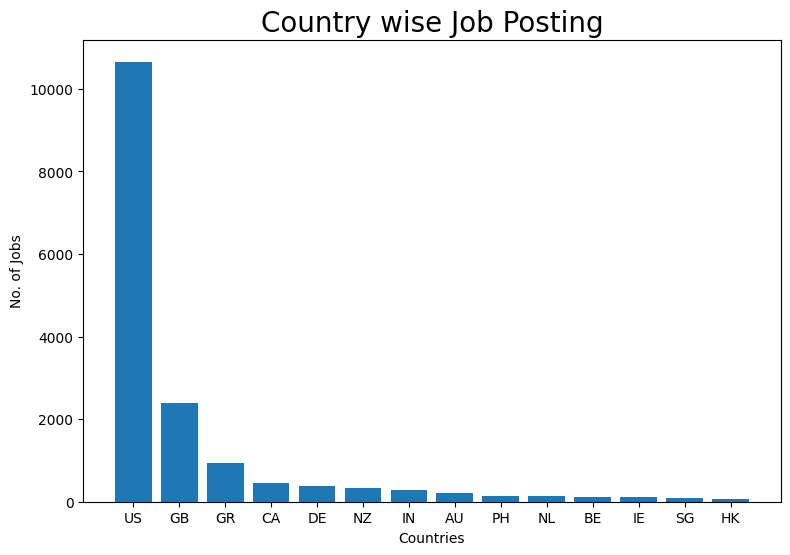

In [16]:
plt.figure(figsize = (9,6))
plt.bar(countr.keys(),countr.values())
plt.title("Country wise Job Posting", size = 20)
plt.xlabel('Countries')
plt.ylabel('No. of Jobs')
plt.show()

In [17]:
# It counts the total number of required education except the empty required education, there are many entries for required education in the column which has low job posting so it will be showing only top 9 countries (if empty required education is also included in the top 9 then it will be removed)

edu = dict(df.required_education.value_counts()[:9])
del edu['']
edu

{"Bachelor's Degree": np.int64(5145),
 'High School or equivalent': np.int64(2080),
 'Unspecified': np.int64(1397),
 "Master's Degree": np.int64(416),
 'Associate Degree': np.int64(274),
 'Certification': np.int64(170),
 'Some College Coursework Completed': np.int64(102),
 'Professional': np.int64(74)}

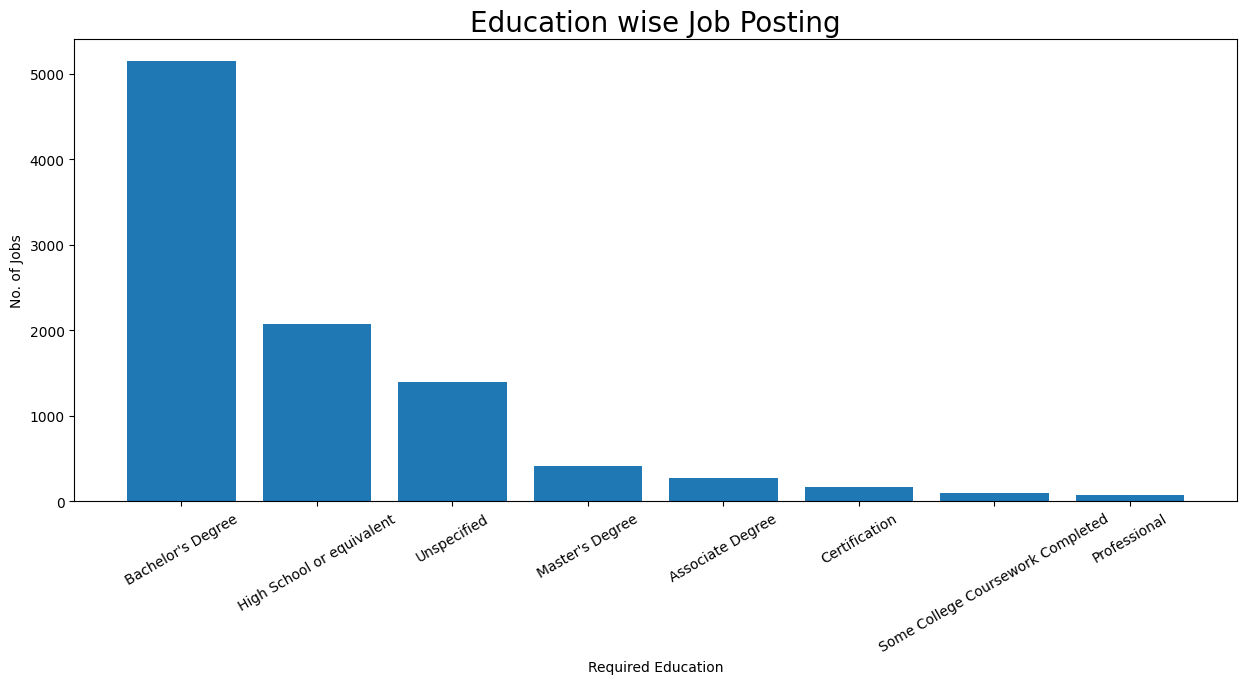

In [18]:
plt.figure(figsize = (15,6))
plt.bar(edu.keys(),edu.values())
plt.title("Education wise Job Posting", size = 20)
plt.xlabel('Required Education')
plt.ylabel('No. of Jobs')
plt.xticks(rotation = 30)
plt.show()

In [19]:
# It will count the top 10 titles of Job which are not fraudulent

print(df[df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [20]:
# It will count the top 10 titles of Job which are fraudulent

print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: count, dtype: int64


## Combining the features

In [21]:
# combing the features
df['text'] = df['title'] +' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']

#deleting the remaining features
columns_to_delete = ['title', 'location', 'department', 'company_profile', 'description',
                     'requirements', 'benefits', 'required_experience', 'required_education',
                     'industry', 'function','country']

for j in columns_to_delete:
    del df[j]

df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [22]:
FraudJobs_text = df[df.fraudulent==1].text
RealJobss_text = df[df.fraudulent==0].text

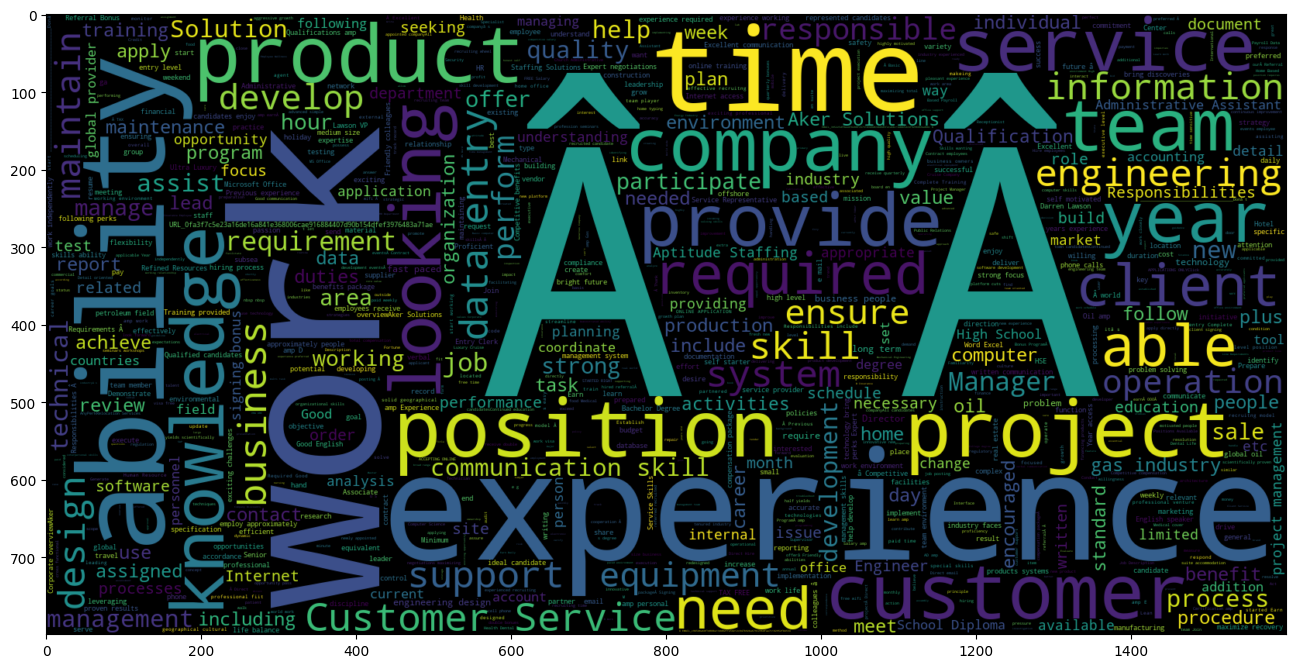

In [23]:
#Creating WordCloud for Fraudulent Jobs

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(FraudJobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

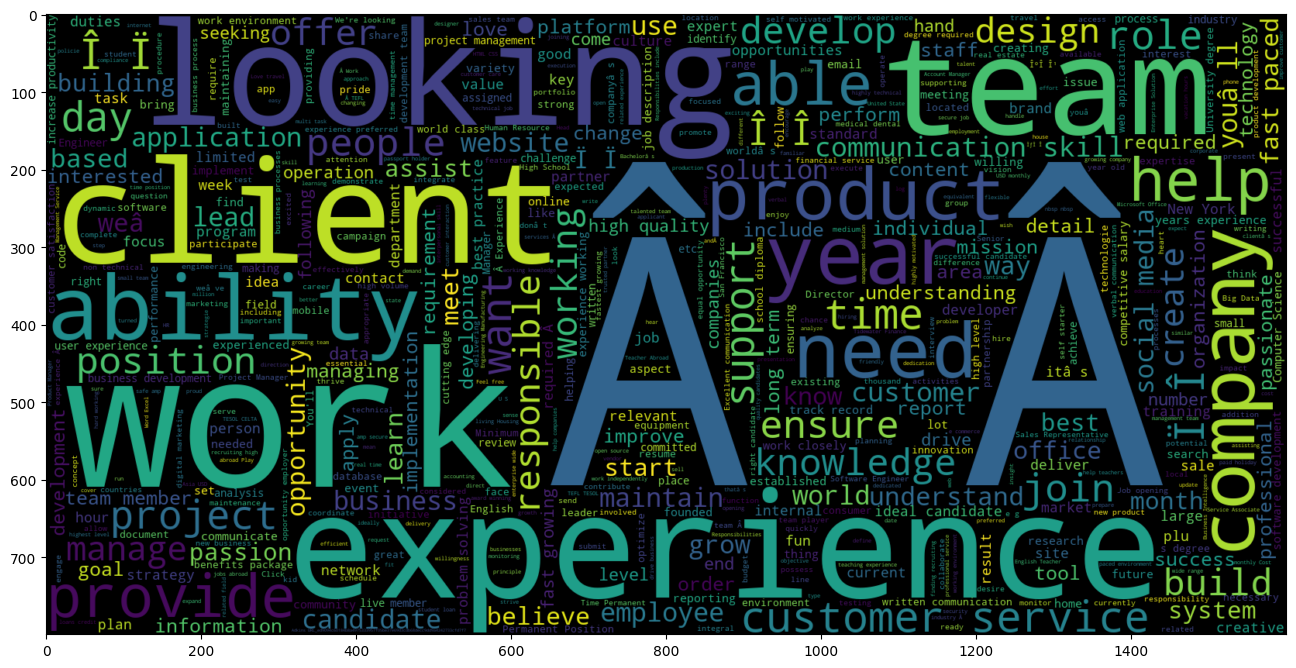

In [24]:
#Creating WordCloud for Non-Fraudulent Jobs

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(RealJobss_text)))
plt.imshow(wc,interpolation = 'bilinear')

## NLP Pipelining

In [26]:
%pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 1.9 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 2.0 MB/s eta 0:00:06
     ------ --------------------------------- 2.1/12.8 MB 2.1 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 2.3 MB/s eta 0:00:05
     ---------- ----------------------------- 3.4/12.8 MB 2.5 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.8 MB 2.6 MB/s eta 0:00:04
     -------------- ------------------------- 4.7/12.8 MB 2.6 MB/s eta 0:00:04
     ----------------- ---------------------- 5.5/12.8 MB 2.7 MB/s eta 0:00:03
     ----------------

In [25]:
# Cleaning and preprocessing

# List of punctuation marks
punctuations = string.punctuation

# List of stop words
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

# Tokenizing function
def spacy_tokenizer(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Lemmatize each token and convert to lowercase
    lemmatized_tokens = [token.lemma_.lower() for token in doc]
    
    return lemmatized_tokens

In [28]:
df['text'] = df['text'].apply(spacy_tokenizer)

In [29]:
df.to_csv("cleaned_jobs.csv", index=False)

print("✅ Cleaned dataset saved as cleaned_jobs.csv")

✅ Cleaned dataset saved as cleaned_jobs.csv


In [28]:
df1 = pd.read_csv("cleaned_jobs.csv")

In [29]:
import ast
df1['text'] = df1['text'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [30]:
df1['text'].values[2]

['commission',
 'machinery',
 'assistant',
 '(',
 'cma',
 ')',
 'valor',
 'services',
 'provide',
 'workforce',
 'solutions',
 'that',
 'meet',
 'the',
 'need',
 'of',
 'company',
 'across',
 'the',
 'private',
 'sector',
 ',',
 'with',
 'a',
 'special',
 'focus',
 'on',
 'the',
 'oil',
 '&',
 'amp',
 ';',
 'gas',
 'industry',
 '.',
 'â',
 '\xa0',
 'valor',
 'services',
 'will',
 'be',
 'involve',
 'with',
 'you',
 'throughout',
 'every',
 'step',
 'of',
 'the',
 'hiring',
 'process',
 'and',
 'remain',
 'in',
 'contact',
 'with',
 'you',
 'all',
 'the',
 'way',
 'through',
 'the',
 'final',
 'step',
 'of',
 'signing',
 'of',
 'the',
 'employment',
 'contract',
 'with',
 'your',
 'new',
 'employer',
 '.',
 'â',
 '\xa0',
 'valor',
 'services',
 'be',
 'found',
 'with',
 'the',
 'vision',
 'of',
 'employ',
 'the',
 'unique',
 'skill',
 ',',
 'experience',
 ',',
 'and',
 'quality',
 'of',
 'americaâ€',
 '™',
 's',
 'fine',
 'veteran',
 'to',
 'provide',
 'private',
 'sector',
 'company',


In [31]:
df1.head()

,fraudulent,text
0,0,"[marketing, intern, we, be, food52, ,, and, we..."
1,0,"[customer, service, -, cloud, video, productio..."
2,0,"[commission, machinery, assistant, (, cma, ), ..."
3,0,"[account, executive, -, washington, dc, our, p..."
4,0,"[bill, review, manager, spotsource, solutions,..."


In [32]:
df1['text'] = df1['text'].apply(lambda x: " ".join(x)) # Converting tokens(list) into string b/c fit_transform() only takes string

In [33]:
df1.head()

,fraudulent,text
0,0,"marketing intern we be food52 , and we have cr..."
1,0,customer service - cloud video production 90 s...
2,0,commission machinery assistant ( cma ) valor s...
3,0,account executive - washington dc our passion ...
4,0,bill review manager spotsource solutions llc b...


In [34]:
# It will count the frequency of top 100 words and put it into the new data frame (main_df), It is basically converting string text to vector text

cv = TfidfVectorizer(max_features = 100, stop_words='english')
x = cv.fit_transform(df1['text'])
df2 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
df1.drop(["text"], axis = 1, inplace = True)
main_df = pd.concat([df2,df1], axis = 1)

main_df.head()

,ability,able,amp,application,base,benefit,brand,build,business,candidate,...,user,want,web,weâ,work,world,write,year,youâ,fraudulent
0,0.000000,0.000000,0.103398,0.00000,0.000000,0.000000,0.000000,0.000000,0.094287,0.000000,...,0.0,0.0,0.000000,0.0,0.267712,0.000000,0.00000,0.000000,0.0,0
1,0.034653,0.041884,0.067056,0.04145,0.032962,0.000000,0.244306,0.000000,0.122294,0.035551,...,0.0,0.0,0.043057,0.0,0.173617,0.406289,0.00000,0.000000,0.0,0
2,0.000000,0.000000,0.107643,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228277,...,0.0,0.0,0.000000,0.0,0.139352,0.000000,0.00000,0.000000,0.0,0
3,0.046306,0.000000,0.000000,0.00000,0.000000,0.112315,0.000000,0.049975,0.367686,0.000000,...,0.0,0.0,0.000000,0.0,0.086999,0.217163,0.10424,0.074712,0.0,0
4,0.000000,0.114153,0.091379,0.00000,0.000000,0.114540,0.000000,0.000000,0.083327,0.000000,...,0.0,0.0,0.000000,0.0,0.118297,0.000000,0.00000,0.000000,0.0,0


## Splitting the dataset for training and prediction

In [35]:
X = main_df.drop(columns=['fraudulent'])
y = main_df['fraudulent']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The train_test_split function shuffles the data by default. Setting random_state ensures reproducibility.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12516, 100)
(5364, 100)
(12516,)
(5364,)


## Using Random Forest Classifier to train and predict

- `n_jobs`: Number of cores
- `oob_score = True`: It will include the oob (out of bag, these datasets are not included in the training because theseare left out to give to the base learners which are desicion trees.) - dataset for the training too.
- `n_estimators`: Total number of desicion trees
- `criterion`:  It refers to the function used to measure the quality of a split during the tree-building process. The criterion is a crucial aspect of constructing decision trees as it guides the algorithm in making decisions about how to split the data at each node to create branches.

In [36]:
# Training the model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = 4, oob_score = True, n_estimators = 100, criterion = "entropy")
model = rfc.fit(X_train, y_train)

In [37]:
# Calculate the training accuracy using the 'score' method
training_accuracy = rfc.score(X_train, y_train)

# Access the OOB score
oob_score = rfc.oob_score_

# Print the training accuracy
print("Training Accuracy:", training_accuracy*100)

# Print the OOB score/accuarcy
print("OOB Score:", oob_score*100)

Training Accuracy: 99.96804090763823
OOB Score: 96.98785554490253


In [38]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test, pred)
print("Accuracy after prediction on Test datasets: ", score*100)

Accuracy after prediction on Test datasets:  96.92393736017897


In [39]:
# Generate the classification report
class_report = classification_report(y_test, pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5093
           1       0.99      0.39      0.56       271

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.77      5364
weighted avg       0.97      0.97      0.96      5364



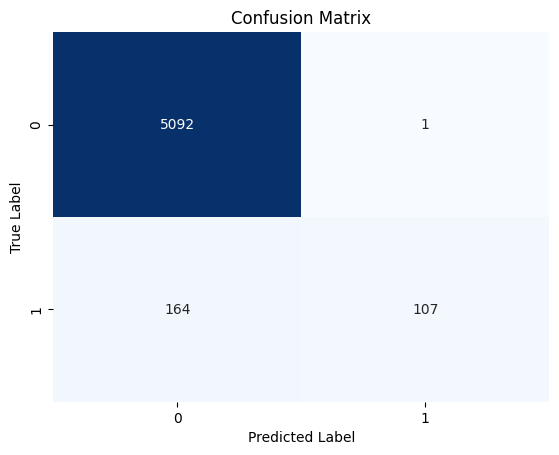

In [40]:
# Create confusion matrix
test_confusion_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix
sns.heatmap(test_confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Saving the models

In [41]:
import joblib

# Save the trained model
joblib.dump(rfc,'RFCmodel')

# Save the TF-IDF vectorizer
joblib.dump(cv, 'TFIDF_vectorizer.joblib')

['TFIDF_vectorizer.joblib']

In [42]:
import json
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Prepare results dictionary
results = {
    # Full dataset info
    "total_samples": int(len(df)),           # total records in the dataset
    "real_jobs": int(np.sum(df['fraudulent'] == 0)),  # total real jobs
    "fake_jobs": int(np.sum(df['fraudulent'] == 1)),  # total fake jobs

    # Model performance (based on test set)
    "model_accuracy": float(accuracy_score(y_test, y_pred)),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

# 3. Save to JSON
with open("results.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ Results saved to results.json")
print(json.dumps(results, indent=4))


✅ Results saved to results.json
{
    "total_samples": 17880,
    "real_jobs": 17014,
    "fake_jobs": 866,
    "model_accuracy": 0.9692393736017897,
    "confusion_matrix": [
        [
            5092,
            1
        ],
        [
            164,
            107
        ]
    ]
}
